<a href="https://colab.research.google.com/github/menezesglesia/livro-receitas/blob/master/Trilha_4_FlorestaxAgricultura-Glesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

floresta = pd.read_csv('/content/forest_land_total_area_ha.csv')
floresta.head()

,país,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420,420
1,Afeganistão,"1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M","1,35M"
2,Angola,61M,"60,9 milhões","60,7 milhões","60,6 milhões","60,5 milhões","60,4 milhões","60,2 milhões","60,1 milhões",60M,"59,9 milhões","59,7 milhões","59,6 milhões","59,5 milhões","59,4 milhões","59,2 milhões","59,1 milhões",59M,"58,9 milhões","58,7M","58,6 milhões","58,5 milhões","58,4 milhões","58,2 milhões","58,1 M",58M,"57,9 milhões"
3,Anguilla,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500
4,Albânia,789k,787k,785k,783k,781k,779k,777k,775k,773k,771k,769k,772k,775k,777k,780k,782k,781k,780k,779k,778k,776k,775k,774k,773k,772k,772k


In [6]:
floresta_BR = floresta[ floresta.país == 'Brasil' ]
floresta_BR.replace('[M]', '', regex=True, inplace = True)
floresta_BR

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,país,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
28,Brasil,547,544,542,539,537,534,531,529,526,524,521,518,515,513,510,507,505,503,502,500,498,497,496,496,495,494


In [7]:
BR = pd.melt(floresta_BR, id_vars=['país'])
BR['value'] = BR['value'].astype(float)
BR.head()

,país,variable,value
0,Brasil,1989,547.0
1,Brasil,1990,544.0
2,Brasil,1991,542.0
3,Brasil,1992,539.0
4,Brasil,1993,537.0


In [8]:
BR = BR.rename(columns={'variable':'ano','value':'floresta'})
BR.head()

,país,ano,floresta
0,Brasil,1989,547.0
1,Brasil,1990,544.0
2,Brasil,1991,542.0
3,Brasil,1992,539.0
4,Brasil,1993,537.0


In [9]:
agro = pd.read_csv('/content/agricultural_land_percent_of_land_area.csv')

agro_BR = agro[ agro.country == 'Brazil' ]
agro_BR = agro_BR.replace('Brazil', 'Brasil')
agro_BR = agro_BR.replace('country','país')
agro_BR

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
26,Brasil,18.8,19.2,19.7,20.1,20.6,21.0,21.4,21.9,22.3,22.8,23.2,23.6,24.0,24.4,24.9,25.5,26.0,26.6,27.2,27.8,28.0,28.3,28.5,28.7,29.0,28.8,28.6,28.4,28.3,28.1,27.9,27.8,27.6,27.4,27.3,27.3,27.3,27.3,27.3,27.3,27.3,27.3,27.4,27.4,27.4,27.4,27.5,27.6,27.7,27.7,27.8,27.9,28.0,28.1,28.2,28.3,28.3,28.3


In [10]:
agro_BR = pd.melt(agro_BR, id_vars=['country'])
agro_BR = agro_BR.rename(columns={'variable':'ano','value':'agro', 'country': 'país'})
agro_BR.head()

,país,ano,agro
0,Brasil,1960,18.8
1,Brasil,1961,19.2
2,Brasil,1962,19.7
3,Brasil,1963,20.1
4,Brasil,1964,20.6


In [11]:
BR = pd.merge(BR,agro_BR,on=['país','ano'])
BR = BR.tail(14)
BR


,país,ano,floresta,agro
12,Brasil,2001,515.0,27.3
13,Brasil,2002,513.0,27.4
14,Brasil,2003,510.0,27.4
15,Brasil,2004,507.0,27.4
16,Brasil,2005,505.0,27.4
17,Brasil,2006,503.0,27.5
18,Brasil,2007,502.0,27.6
19,Brasil,2008,500.0,27.7
20,Brasil,2009,498.0,27.7
21,Brasil,2010,497.0,27.8


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

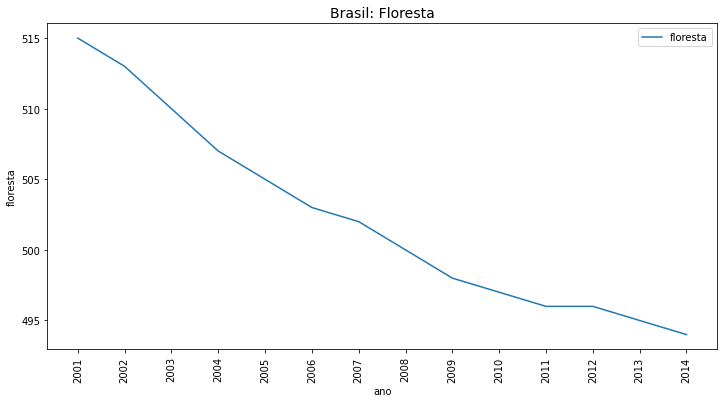

In [13]:
plt.figure(figsize=(12,6))

sns.lineplot(x=BR.ano, y=BR.floresta, label='floresta')
#sns.lineplot(x=BR.ano, y=BR.agro, label='agro')

plt.title('Brasil: Floresta', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

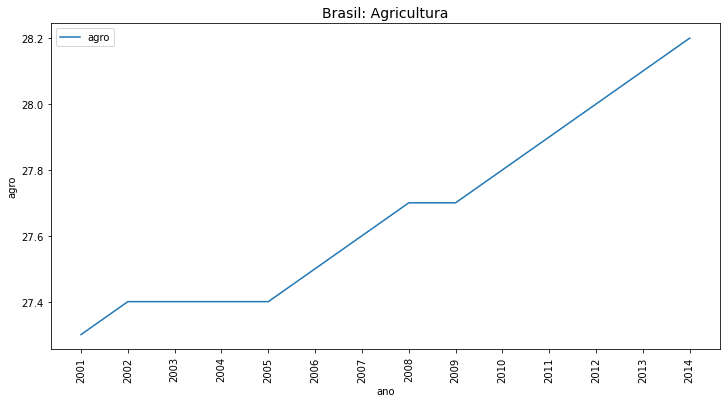

In [14]:
plt.figure(figsize=(12,6))

#sns.lineplot(x=BR.ano, y=BR.floresta, label='floresta')
sns.lineplot(x=BR.ano, y=BR.agro, label='agro')

plt.title('Brasil: Agricultura', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

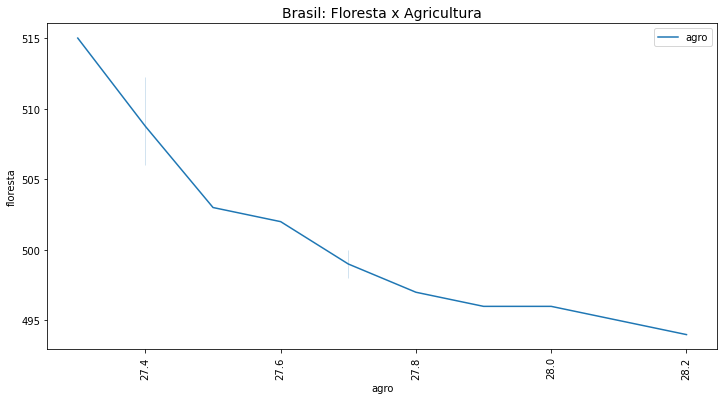

In [15]:
plt.figure(figsize=(12,6))

#sns.lineplot(x=BR.ano, y=BR.floresta, label='floresta')
sns.lineplot(y=BR.floresta, x=BR.agro, label='agro')

plt.title('Brasil: Floresta x Agricultura', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

Análise: Percebe-se que a medida que a areas de agricultura cresce em percentual, diminui-se os hectares de floresta.
